<a href="https://colab.research.google.com/github/tutsilianna/Introduction_to_ML_and_Advanced_ML_Python/blob/main/Clustering/Clustering_2_%7C_Exercise_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using `K-means` for image compression


Clustering can be used for image compression. The scheme is surprisingly simple: similar, adjacent colors should be combined into one color. Let's do it ourselves. You will work with the following image.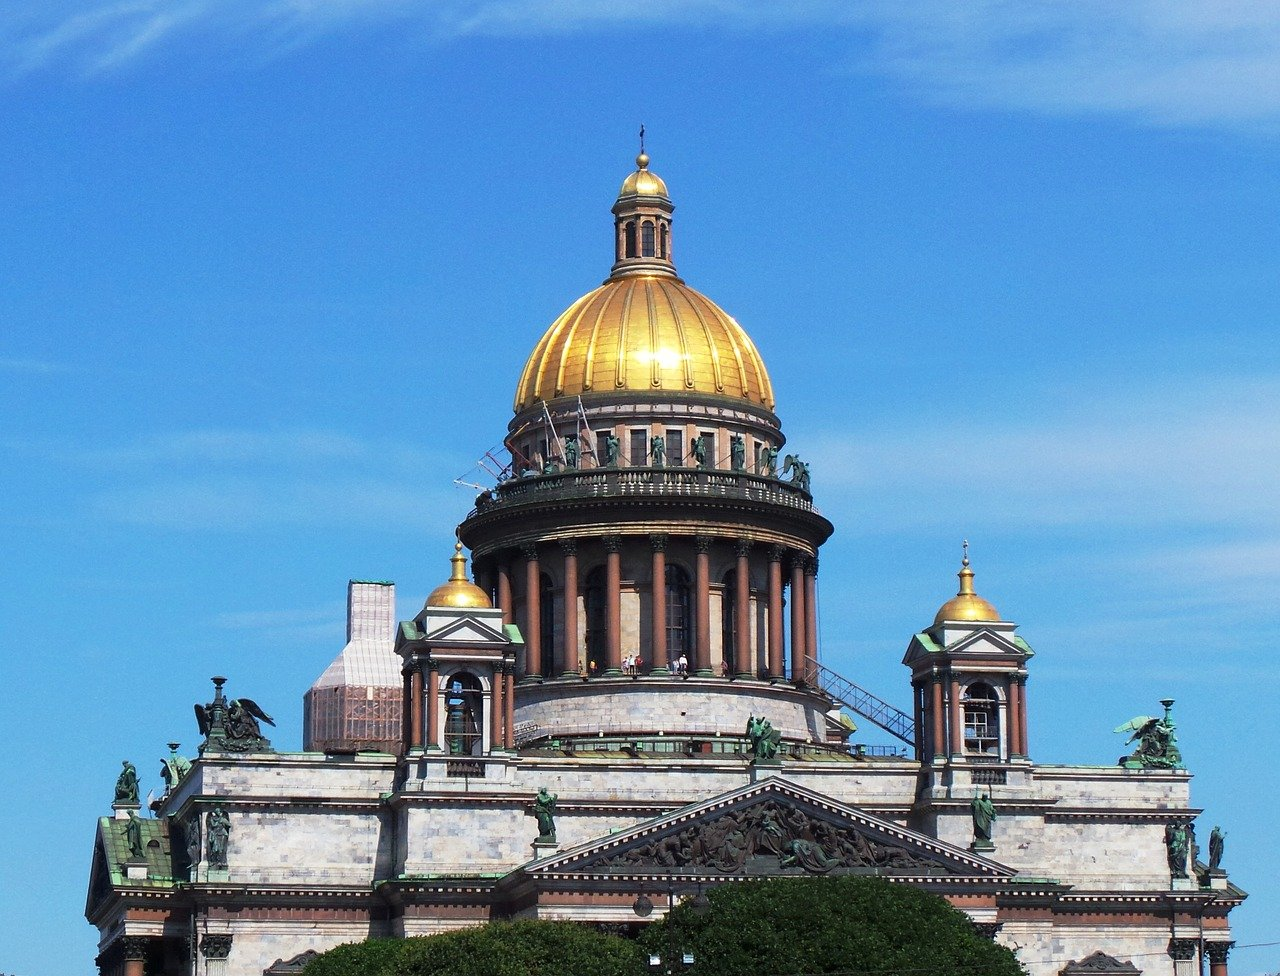

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


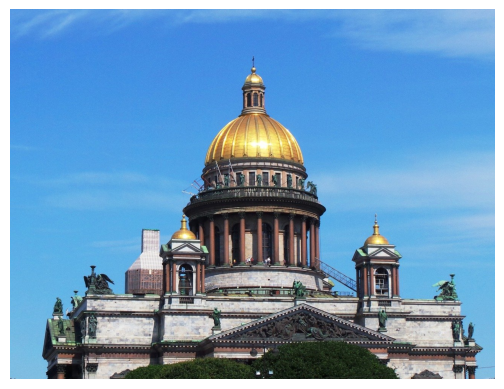

In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
import numpy as np


# Путь к изображению
img_path = '/content/drive/MyDrive/itmo|AI_cources/spb_st_isaacs_2.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img);

The image shown is a three-channel (RGB) image. Calculate the average pixel intensity across all channels.

In [ ]:
average_intensity = np.mean(img, axis=(0,1))
average_intensity = np.sum(average_intensity) / 3
round(average_intensity, 3)

141.0

Normalize pixel intensity values by dividing all values by $255$. Calculate the average value of pixel intensity for all channels after the transformation has been done.

In [ ]:
img_normalize = img/255

In [ ]:
average_intensity_normalize = np.mean(img_normalize, axis=(0,1))
average_intensity_normalize = np.sum(average_intensity_normalize) / 3
round(average_intensity_normalize, 3)

0.553

Let's make sure that the original color space with about $16$ million possible states ($256^3$) is too large, and its dimensionality can be reduced. For clarity, let's build only some subsamples of dependencies of intensity values and only on a random subset of pixels.

"Straighten" the image so that <code>.shape</code> of the corresponding array has the following form <code>(height * width, 3)</code>.

In [ ]:
img_normalize_ = img_normalize.reshape(img_normalize.shape[0] * img_normalize.shape[1], 3)
img_normalize_.shape

(1249280, 3)

In [ ]:
# The function takes as input a "straightened" array corresponding to the image

def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

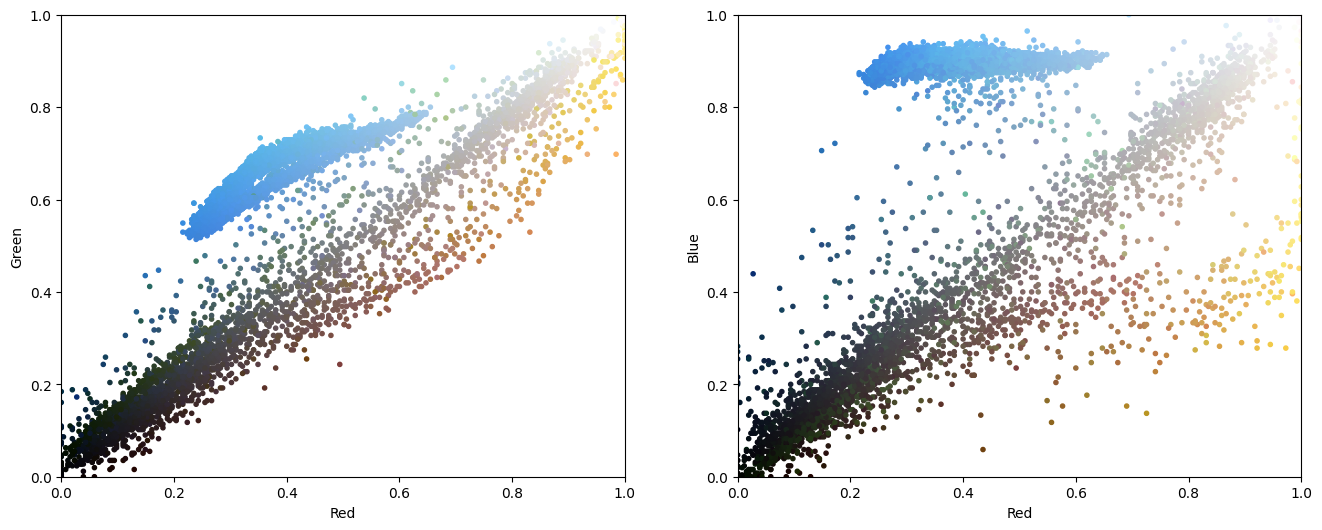

In [ ]:
plot_pixels(img_normalize_)

Let's transform $16$ million possibilities into just $16$ possibilities by using <code>K-means</code>. To speed up the algorithm, we'll use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html"><code>K-means</code></a> on batches (subsets of the dataset). We'll see if this spoils the result.

Train the <code>MiniBatchKMeans</code> model on a normalized and "straightened" image with the parameters <code>n_clusters=16, random_state=10</code>.

In the image, replace the color values of each pixel with the coordinate values of the centroid of the cluster to which the pixel was assigned. Plot color dependency graphs using <code>plot_pixels()</code> with the new palette (the parameter <code>colors</code>).

In [ ]:
from sklearn.cluster import MiniBatchKMeans
import warnings
warnings.filterwarnings("ignore")

mb_kmeans = MiniBatchKMeans(n_clusters=16, random_state=10).fit(img_normalize_)

centers = mb_kmeans.cluster_centers_

In [ ]:
# Получение меток кластеров для каждого пикселя
labels = mb_kmeans.labels_

# Преобразование меток кластеров обратно в форму изображения
labels = labels.reshape(img_normalize.shape[0], img_normalize.shape[1])

# Замена цветов пикселей на цвета центров кластеров
img_new = centers[labels]

Calculate the average pixel intensity value of the resulting image.

In [ ]:
# Расчет среднего значения интенсивности пикселей в преобразованном изображении
average_intensity_new = np.mean(img_new, axis=(0,1))
average_intensity_new = np.sum(average_intensity_new) / 3
round(average_intensity_new, 3)

0.554

Enter the image number that corresponds to the $16$ color palette.

In [ ]:
# Преобразование преобразованного изображения в форму данных для plot_pixels
data_new = img_new.reshape(img_new.shape[0] * img_new.shape[1], 3)

# Построение графиков зависимости цвета с использованием новой палитры
plot_pixels(data_new, colors=centers)

Construct an image of size $4 \times 4$ based on the $16$ colors obtained. Select the correct image.

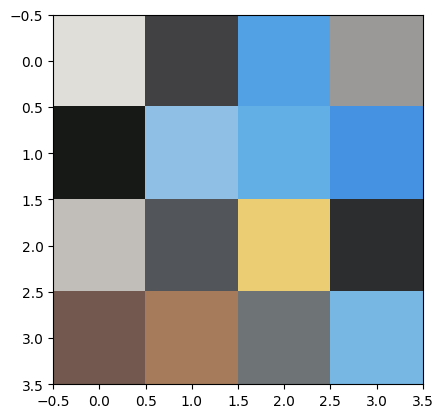

In [ ]:
# Выбор первых 16 цветов из массива центров кластеров
colors = centers[:16]

# Создание нового изображения размером 4x4
new_img = np.zeros((4, 4, 3))

# Заполнение нового изображения цветами
for i in range(4):
   for j in range(4):
       new_img[i, j] = colors[i*4 + j]

# Вывод нового изображения
plt.imshow(new_img)
plt.show()

It's time to look at the result! Line up next to the original image and an image that uses only $16$ of colors.

In [ ]:
from PIL import Image

# Выбор первых 16 цветов из массива центров кластеров
colors = centers[:16]

# Создание нового изображения размером 4x4
new_img = Image.new('RGB', (4, 4))

# Заполнение нового изображения цветами
for i in range(4):
    for j in range(4):
        new_img.putpixel((j, i), tuple(round(colors[i*4 + j]*255)))

# Вывод нового изображения
new_img.show()


TypeError: ignored